# Modeling and Simulation in Python

Chapter 4

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

## Returning values

Here's a simple function that returns a value:

In [2]:
def add_five(x):
    return x + 5

And here's how we call it.

In [3]:
y = add_five(3)

8

If you run a function on the last line of a cell, Jupyter displays the result:

In [4]:
add_five(5)

10

But that can be a bad habit, because usually if you call a function and don't assign the result in a variable, the result gets discarded.

In the following example, Jupyter shows the second result, but the first result just disappears.

In [5]:
add_five(3)
add_five(5)

10

When you call a function that returns a variable, it is generally a good idea to assign the result to a variable.

In [6]:
y1 = add_five(3)
y2 = add_five(5)

print(y1, y2)

8 10


**Exercise:** Write a function called `make_state` that creates a `State` object with the state variables `olin=10` and `wellesley=2`, and then returns the new `State` object.

Write a line of code that calls `make_state` and assigns the result to a variable named `init`.

In [7]:
def make_state ():
    return State(olin=10,wellesley =2)


In [8]:
init = make_state()

,values
olin,10
wellesley,2


## Running simulations

Here's the code from the previous notebook.

In [9]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

Here's a modified version of `run_simulation` that creates a `State` object, runs the simulation, and returns the `State` object.

In [10]:
def run_simulation(p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

Now `run_simulation` doesn't plot anything:

In [11]:
state = run_simulation(0.4, 0.2, 60)

,values
olin,1
wellesley,11
olin_empty,3
wellesley_empty,0


But after the simulation, we can read the metrics from the `State` object.

In [12]:
state.olin_empty

3

Now we can run simulations with different values for the parameters.  When `p1` is small, we probably don't run out of bikes at Olin.

In [13]:
state = run_simulation(0.2, 0.2, 60)
state.olin_empty

0

When `p1` is large, we probably do.

In [14]:
state = run_simulation(0.6, 0.2, 60)
state.olin_empty

9

## More for loops

`linspace` creates a NumPy array of equally spaced numbers.

In [15]:
p1_array = linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

We can use an array in a `for` loop, like this:

In [16]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


This will come in handy in the next section.

`linspace` is defined in `modsim.py`.  You can get the documentation using `help`.

In [17]:
help(linspace)

Help on function linspace in module modsim:

linspace(start, stop, num=50, **options)
    Returns an array of evenly-spaced values in the interval [start, stop].
    
    start: first value
    stop: last value
    num: number of values
    
    Also accepts the same keyword arguments as np.linspace.  See
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    
    returns: array or Quantity



`linspace` is based on a NumPy function with the same name.  [Click here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to read more about how to use it.

**Exercise:** 
Use `linspace` to make an array of 10 equally spaced numbers from 1 to 10 (including both).

In [18]:
p1_array = linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

**Exercise:** The `modsim` library provides a related function called `linrange`.  You can view the documentation by running the following cell:

In [19]:
help(linrange)

Help on function linrange in module modsim:

linrange(start=0, stop=None, step=1, **options)
    Returns an array of evenly-spaced values in the interval [start, stop].
    
    This function works best if the space between start and stop
    is divisible by step; otherwise the results might be surprising.
    
    By default, the last value in the array is `stop-step`
    (at least approximately).
    If you provide the keyword argument `endpoint=True`,
    the last value in the array is `stop`.
    
    start: first value
    stop: last value
    step: space between values
    
    Also accepts the same keyword arguments as np.linspace.  See
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    
    returns: array or Quantity



Use `linrange` to make an array of numbers from 1 to 11 with a step size of 2.

In [27]:
p2_array = linrange(1,11,2)

array([1., 3., 5., 7., 9.])

## Sweeping parameters

`p1_array` contains a range of values for `p1`.

In [35]:
p2 = 0.2
num_steps = 60
p1_array = linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

The following loop runs a simulation for each value of `p1` in `p1_array`; after each simulation, it prints the number of unhappy customers at the Olin station:

In [36]:
for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    print(p1, state.olin_empty)

0.0 0
0.1 0
0.2 0
0.30000000000000004 1
0.4 2
0.5 12
0.6000000000000001 20
0.7000000000000001 15
0.8 23
0.9 28
1.0 41


Now we can do the same thing, but storing the results in a `SweepSeries` instead of printing them.



In [37]:
sweep = SweepSeries()

for p1 in p1_array:
    state = run_simulation(p1, p2, num_steps)
    sweep[p1] = state.olin_empty

And then we can plot the results.

Saving figure to file figs/chap02-fig02.pdf


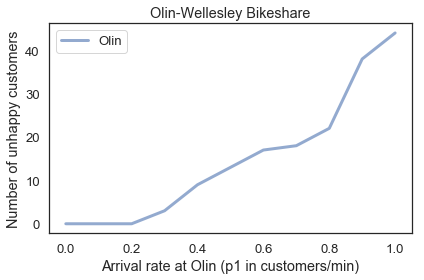

In [38]:
plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

savefig('figs/chap02-fig02.pdf')

## Exercises

**Exercise:** Wrap this code in a function named `sweep_p1` that takes an array called `p1_array` as a parameter.  It should create a new `SweepSeries`, run a simulation for each value of `p1` in `p1_array`, store the results in the `SweepSeries`, and return the `SweepSeries`.

Use your function to plot the number of unhappy customers at Olin as a function of `p1`.  Label the axes.

In [47]:
def sweep_p1(p1_array):
    sweep = SweepSeries()

    for p1 in p1_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p1] = state.olin_empty
    return sweep

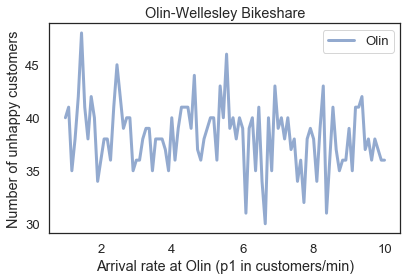

In [48]:
sweep = sweep_p1(linspace(1,10,100))
plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')


**Exercise:** Write a function called `sweep_p2` that runs simulations with `p1=0.5` and a range of values for `p2`.  It should store the results in a `SweepSeries` and return the `SweepSeries`.


In [49]:
def sweep_p2(p2_array):
    sweep = SweepSeries()

    for p2 in p2_array:
        state = run_simulation(.5, p2, num_steps)
        sweep[p1] = state.wellesley_empty
    return sweep

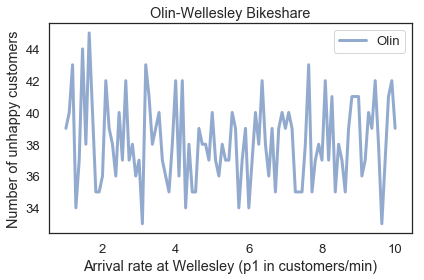

In [50]:
sweep = sweep_p1(linspace(1,10,100))
plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Wellesley (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

## Optional exercises

The following two exercises are a little more challenging.  If you are comfortable with what you have learned so far, you should give them a try.  If you feel like you have your hands full, you might want to skip them for now.

**Exercise:** Because our simulations are random, the results vary from one run to another, and the results of a parameter sweep tend to be noisy.  We can get a clearer picture of the relationship between a parameter and a metric by running multiple simulations with the same parameter and taking the average of the results.

Write a function called `run_multiple_simulations` that takes as parameters `p1`, `p2`, `num_steps`, and `num_runs`.

`num_runs` specifies how many times it should call `run_simulation`.

After each run, it should store the total number of unhappy customers (at Olin or Wellesley) in a `TimeSeries`.  At the end, it should return the `TimeSeries`.

Test your function with parameters

```
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
```

Display the resulting `TimeSeries` and use the `mean` function provided by the `TimeSeries` object to compute the average number of unhappy customers.

In [29]:
# Solution goes here

In [30]:
# Solution goes here

**Exercise:**  Continuting the previous exercise, use `run_multiple_simulations` to run simulations with a range of values for `p1` and

```
p2 = 0.3
num_steps = 60
num_runs = 20
```

Store the results in a `SweepSeries`, then plot the average number of unhappy customers as a function of `p1`.  Label the axes.

What value of `p1` minimizes the average number of unhappy customers?

In [31]:
# Solution goes here

In [32]:
# Solution goes here